In [1]:
# 導入函式庫
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import SimpleRNN, Activation, Dense
from keras.optimizers import Adam

# 固定亂數種子，使每次執行產生的亂數都一樣
np.random.seed(1337)


# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 將 training 的 input 資料轉為3維，並 normalize 把顏色控制在 0 ~ 1 之間
X_train = X_train.reshape(-1, 28, 28) / 255.      
X_test = X_test.reshape(-1, 28, 28) / 255.
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)


# 建立簡單的線性執行的模型
model = Sequential()
# 加 RNN 隱藏層(hidden layer)
model.add(SimpleRNN(
    # 如果後端使用tensorflow，batch_input_shape 的 batch_size 需設為 None.
    # 否則執行 model.evaluate() 會有錯誤產生.
    batch_input_shape=(None, 28, 28), 
    units= 50,
    unroll=True,
)) 
# 加 output 層
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# 一批訓練多少張圖片
BATCH_SIZE = 50     
BATCH_INDEX = 0     
# 訓練模型 4001 次
for step in range(1, 4001):
    # data shape = (batch_num, steps, inputs/outputs)
    X_batch = X_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :, :]
    Y_batch = y_train[BATCH_INDEX: BATCH_INDEX+BATCH_SIZE, :]
    # 逐批訓練
    loss = model.train_on_batch(X_batch, Y_batch)
    BATCH_INDEX += BATCH_SIZE
    BATCH_INDEX = 0 if BATCH_INDEX >= X_train.shape[0] else BATCH_INDEX

    # 每 500 批，顯示測試的準確率
    if step % 500 == 0:
        # 模型評估
        loss, accuracy = model.evaluate(X_test, y_test, batch_size=y_test.shape[0], 
            verbose=False)
        print("test loss: {}  test accuracy: {}".format(loss,accuracy))
        

# 預測(prediction)
X = X_test[0:10,:]
predictions = model.predict_classes(X)
# get prediction result
print(predictions)

# 模型結構存檔
# from keras.models import model_from_json
# json_string = model.to_json()
# with open("SimpleRNN.config", "w") as text_file:
#     text_file.write(json_string)
    
# # 模型訓練結果存檔
# model.save_weights("SimpleRNN.weight")

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
test loss: 0.7160184383392334  test accuracy: 0.7797999978065491
test loss: 0.5249003767967224  test accuracy: 0.840499997138977
test loss: 0.5155325531959534  test accuracy: 0.842199981212616
test loss: 0.35455140471458435  test accuracy: 0.8980000019073486
test loss: 0.4040292203426361  test accuracy: 0.8806999921798706
test loss: 0.3487951159477234  test accuracy: 0.895799994468689
test loss: 0.33969226479530334  test accuracy: 0.8959000110626221
test loss: 0.25843384861946106  test accuracy: 0.9279000163078308
[7 2 1 0 4 1 4 9 4 9]


In [4]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "SimpleRNN", "config": {"name": "simple_rnn_1", "trainable": true, "batch_input_shape": [null, 28, 28], "dtype": "float32", "return_sequences": false, "return_state": false, "go_backwards": false, "stateful": false, "unroll": true, "units": 50, "activation": "tanh", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "recurrent_initializer": {"class_name": "Orthogonal", "config": {"gain": 1.0, "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "recurrent_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "recurrent_constraint": null, "bias_constraint": null, "dropout": 0.0, "recurrent_dropout": 0.0}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "floa

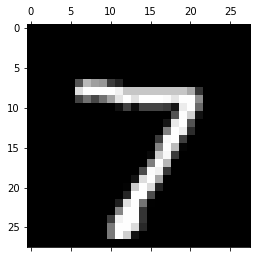

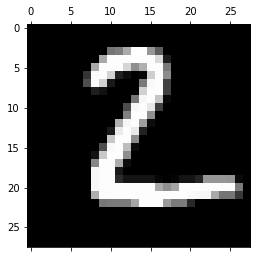

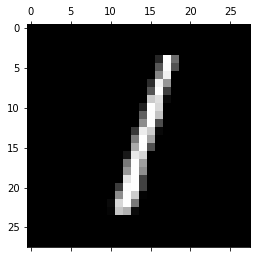

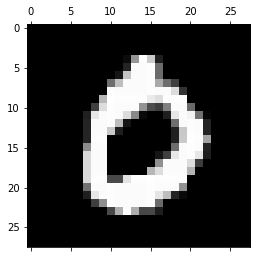

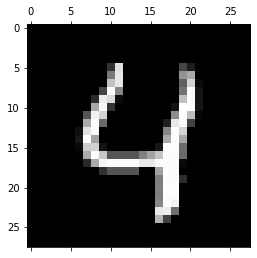

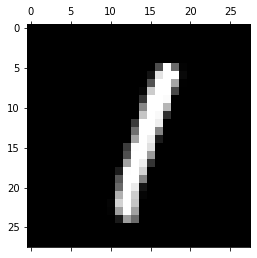

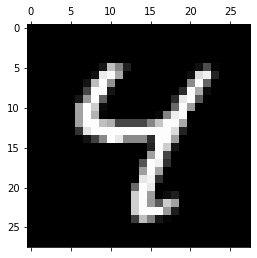

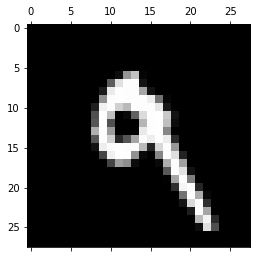

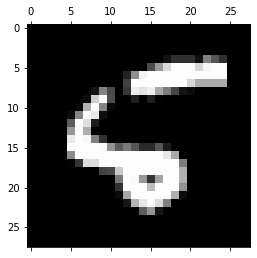

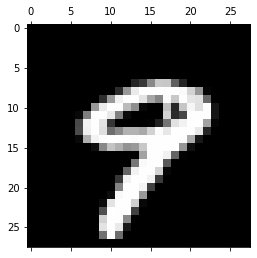

In [24]:
# 矩陣轉回圖片
import matplotlib.pyplot as plt
%matplotlib inline
for i in X:
    plt.matshow(i, cmap=plt.get_cmap('gray'))

In [25]:
predictions

array([7, 2, 1, 0, 4, 1, 4, 9, 4, 9], dtype=int64)

In [30]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)